<a href="https://colab.research.google.com/github/prabhat7777/Data_science_capstone_projects/blob/main/EDA%20on%20telecom%20churn/Personal_notebook_of_Telecom_Churn_Analysis_Capstone_Project_ipynb(milan_Prabhat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

##Let's first define the columns based on their datatype:

**State:** the state in which the customer resides, indicated by a two-letter abbreviation

**Account Length:** the number of days that this account has been active

**Area Code:** the three-digit area code of the corresponding customer’s phone number

**Int’l Plan:** whether the customer has an international calling plan: yes/no

**VMail Plan:** whether the customer has a voice mail feature: yes/no

**VMail Message:** presumably the average number of voice mail messages per month

**Day Mins:** the total number of calling minutes used during the day

**Day Calls:** the total number of calls placed during the day

**Day Charge:** the billed cost of daytime calls

**Eve Mins:** the total number of calling minutes used during the evening

**Eve Calls:** the total number of calls placed during the evening

**Eve Charge:** the billed cost of evening time calls

**Night Mins:** the total number of calling minutes used during the night

**Night Calls:** the total number of calls placed during the night

**Night Charge:** the billed cost of nighttime calls

**Intl Mins:** the total number of international minutes

**Intl Calls:** the total number of international calls

**Intl Charge:** the billed cost for international calls

**CustServ Calls:** the number of calls placed to Customer Service

**Churn?:** whether the customer left the service: true/false

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%lsmagic
%matplotlib inline
import seaborn as sns  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
filepath=  '/content/drive/MyDrive/Colab Notebooks/Almabetter/Telecom Churn Analysis- Prabhat Patel/Telecom Churn.csv'

telecom_df = pd.read_csv(filepath)

In [ ]:
#Checking the columns present in the table

telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

###From above info we can observe we have four categorical columns and 16 numerical columns

In [ ]:
#Checking null in dataset
telecom_df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**There is no point in checking duplicates as we don't have any unique value in our dataset**

In [ ]:
#checking how amny rows and column in dataframe
telecom_df.shape

(3333, 20)

In [ ]:
#Fetching first 5 rows of dataframe
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Fetching last 5 rows of dataframe
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
#Checking the stats of data
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Checking how many different states we have in dataframe
telecom_df['State'].nunique()

51

**We have 51 different states in our dataframe. We can start our analysis on the basis of different states. Before starting our analysis let's check the different area code.**

In [ ]:
#checking unique area code in dataframe
telecom_df['Area code'].nunique()

3

Only 3 unique area codes we have in our dataframe. 

In [ ]:
telecom_df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

In [ ]:
#let's see how many are churning
telecom_df.groupby(['Area code', 'Churn'])['Churn'].count().unstack(level=-1)

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


**As from above observation we can see basis on different area code the churning rate is almost the 14.5% for all the 3 area codes. So this column is not much useful for our analysis. We can drop this column.**

In [ ]:
del telecom_df['Area code']

In [ ]:
#checking the dataset info after deleting columns
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   International plan      3333 non-null   object 
 3   Voice mail plan         3333 non-null   object 
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [ ]:
#Subscribers getting churned
telecom_df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

**Total approx 14.5% of subscribers are getting churned. let's dig more into the dataset and find out the reason why those subscribers are getting churned.**

In [ ]:
#Checking the churners and non churners state-wise
telecom_df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

***We have WV as a state with maximum number of subscribers and CA with minimum number of subscribers.
Orange telecom should focus on the states where we have less number of subscribers to capture more number of subscribers.***

##**Addingthe two new feature in dataset total charge and total local calls.**

In [ ]:
#Adding new feature in dataset (by summing up calling) 
total_localcalls= telecom_df["Total day calls"] + telecom_df["Total night calls"] + telecom_df["Total eve calls"]  
telecom_df["Total Local Calls"] = total_localcalls

In [ ]:
#Summing up charges to see how billing cycle affects them and their churning decision
total_charge_col = telecom_df["Total day charge"] + telecom_df["Total night charge"] + telecom_df["Total eve charge"] + telecom_df["Total intl charge"]
telecom_df["Total Charges"] = total_charge_col


In [ ]:
telecom_df.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Local Calls,Total Charges
0,KS,128,No,Yes,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,False,300,75.56
1,OH,107,No,Yes,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,False,329,59.24
2,NJ,137,No,No,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,False,328,62.29
3,OH,84,Yes,No,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,False,248,66.80
4,OK,75,Yes,No,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,False,356,52.09


In [ ]:
high_day_min=telecom_df.loc[telecom_df["Total day minutes"]>= 290] # Most of the times whenever total day minutes is high then probability of getting churn is so high#
high_day_min.head(5)

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Local Calls,Total Charges
3,OH,84,Yes,No,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,False,248,66.80
15,NY,161,No,No,0,332.9,67,56.59,317.8,97,...,160.6,128,7.23,5.4,9,1.46,4,True,292,92.29
76,DC,82,No,No,0,300.3,109,51.05,181.0,100,...,270.1,73,12.15,11.7,4,3.16,0,True,282,81.75
156,OH,83,No,No,0,337.4,120,57.36,227.4,116,...,153.9,114,6.93,15.8,7,4.27,0,True,350,87.89
197,TX,208,No,No,0,326.5,67,55.51,176.3,113,...,181.7,102,8.18,10.7,6,2.89,2,True,282,81.57


In [ ]:
high_day_charge=telecom_df.loc[telecom_df["Total day charge"]>= 45] # Most of the times whenever total day minutes is high then probability of getting churn is so high#
high_day_charge.tail(5)

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Local Calls,Total Charges
3265,ID,82,No,No,0,266.9,83,45.37,229.7,74,...,251.7,99,11.33,11.0,6,2.97,3,True,256,79.19
3268,WA,84,No,No,0,289.1,100,49.15,233.8,97,...,223.5,148,10.06,12.7,2,3.43,2,True,345,82.51
3272,MD,133,No,No,0,295.0,141,50.15,223.6,101,...,229.4,109,10.32,12.9,4,3.48,2,True,351,82.96
3301,CA,84,No,No,0,280.0,113,47.60,202.2,90,...,156.8,103,7.06,10.4,4,2.81,0,True,306,74.66
3322,MD,62,No,No,0,321.1,105,54.59,265.5,122,...,180.5,72,8.12,11.5,2,3.11,4,True,299,88.39


In [ ]:
telecom_df[telecom_df['Churn']== False].sort_values('Total Local Calls').tail(20)

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Local Calls,Total Charges
3083,MO,174,No,No,0,235.5,108,40.04,142.3,143,...,316.7,131,14.25,12.5,5,3.38,0,False,382,69.77
2574,OR,97,No,No,0,146.0,121,24.82,203.0,141,...,151.8,120,6.83,13.3,2,3.59,1,False,382,52.50
1071,PA,134,No,No,0,205.3,122,34.90,240.5,155,...,179.1,107,8.06,5.0,9,1.35,1,False,384,64.75
3101,AZ,107,No,Yes,32,134.2,101,22.81,211.9,145,...,167.6,138,7.54,8.2,5,2.21,1,False,384,50.57
586,TX,90,Yes,No,0,221.8,97,37.71,203.8,134,...,215.8,154,9.71,8.4,4,2.27,1,False,385,67.01
166,GA,185,No,Yes,31,189.8,126,32.27,163.3,133,...,264.8,126,11.92,7.5,3,2.03,1,False,385,60.10
986,FL,159,No,Yes,15,113.9,102,19.36,145.3,146,...,195.2,137,8.78,11.8,9,3.19,1,False,385,43.68
2063,MD,90,No,No,0,114.4,122,19.45,127.7,154,...,253.1,109,11.39,10.1,5,2.73,2,False,385,44.42
1706,MD,54,No,No,0,273.8,113,46.55,119.6,156,...,267.6,117,12.04,11.7,3,3.16,1,False,386,71.92
781,WV,112,Yes,No,0,161.9,138,27.52,200.9,114,...,134.0,134,6.03,10.7,4,2.89,1,False,386,53.52


**From above observations we can say that customers havingh total local charge less than $70 and making customer service call less than or equal to 3 are loyal customers and Orange telecom should give some offers to them to reatin.**

In [ ]:
telecom_df[telecom_df['Churn']==True].sort_values('Total Charges').head(10)

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Local Calls,Total Charges
1345,SD,98,No,No,0,0.0,0,0.00,159.6,130,...,167.1,88,7.52,6.8,1,1.84,4,True,218,22.93
77,NY,144,No,No,0,61.6,117,10.47,77.1,85,...,173.0,99,7.79,8.2,7,2.21,4,True,301,27.02
1538,WV,113,No,No,0,61.2,111,10.40,92.3,88,...,197.4,114,8.88,13.7,3,3.70,5,True,313,30.83
181,AK,126,No,No,0,58.2,94,9.89,138.7,118,...,136.8,91,6.16,11.9,1,3.21,5,True,303,31.05
2173,KS,47,Yes,No,0,47.8,120,8.13,178.9,123,...,152.6,96,6.87,13.3,7,3.59,0,True,339,33.80
1531,DE,138,Yes,No,0,46.5,104,7.91,186.0,114,...,167.5,95,7.54,9.6,4,2.59,4,True,313,33.85
126,MS,162,No,No,0,70.7,108,12.02,157.5,87,...,154.8,82,6.97,9.1,3,2.46,4,True,277,34.84
21,CO,77,No,No,0,62.4,89,10.61,169.9,121,...,209.6,64,9.43,5.7,6,1.54,5,True,274,36.02
258,KS,92,Yes,No,0,62.6,111,10.64,180.6,126,...,221.7,80,9.98,10.4,2,2.81,1,True,317,38.78
1038,CA,112,No,No,0,111.9,92,19.02,114.0,143,...,146.8,79,6.61,14.1,3,3.81,5,True,314,39.13


###**Above observations shows that if even chages are low also still customers are churned that is because of not good customer service of Orange telecom. This is a serious issue and company should improve their customer services.**

In [ ]:
high_day_charge= telecom_df.loc[telecom_df["Total day charge"]>=45] #Most of the times whenever total day charge is high then probability of getting churn is so high#
high_day_charge.tail()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Local Calls,Total Charges
3265,ID,82,No,No,0,266.9,83,45.37,229.7,74,...,251.7,99,11.33,11.0,6,2.97,3,True,256,79.19
3268,WA,84,No,No,0,289.1,100,49.15,233.8,97,...,223.5,148,10.06,12.7,2,3.43,2,True,345,82.51
3272,MD,133,No,No,0,295.0,141,50.15,223.6,101,...,229.4,109,10.32,12.9,4,3.48,2,True,351,82.96
3301,CA,84,No,No,0,280.0,113,47.60,202.2,90,...,156.8,103,7.06,10.4,4,2.81,0,True,306,74.66
3322,MD,62,No,No,0,321.1,105,54.59,265.5,122,...,180.5,72,8.12,11.5,2,3.11,4,True,299,88.39


###**From above we get to know that if high day charge is causing the subscriber to churned. **

In [ ]:
#which subscriber has maximum total charges
telecom_df.iloc[telecom_df['Total Charges'].argmax()]  

State                        NY
Account length               64
International plan          Yes
Voice mail plan              No
Number vmail messages         0
Total day minutes         346.8
Total day calls              55
Total day charge          58.96
Total eve minutes         249.5
Total eve calls              79
Total eve charge          21.21
Total night minutes       275.4
Total night calls           102
Total night charge        12.39
Total intl minutes         13.3
Total intl calls              9
Total intl charge          3.59
Customer service calls        1
Churn                      True
Total Local Calls           236
Total Charges             96.15
Name: 985, dtype: object

In [ ]:
#subscriber with minimum charges
telecom_df.iloc[telecom_df['Total Charges'].argmin()]

State                        SD
Account length               98
International plan           No
Voice mail plan              No
Number vmail messages         0
Total day minutes           0.0
Total day calls               0
Total day charge            0.0
Total eve minutes         159.6
Total eve calls             130
Total eve charge          13.57
Total night minutes       167.1
Total night calls            88
Total night charge         7.52
Total intl minutes          6.8
Total intl calls              1
Total intl charge          1.84
Customer service calls        4
Churn                      True
Total Local Calls           218
Total Charges             22.93
Name: 1345, dtype: object

***From above two observations its clear that billing and customer service calls are clearly leading to churning of subscriber.***


In [ ]:
#observing trend between customer service calls and churning
#subscribers calling Customer service calls twice more than average

poorservice= telecom_df[telecom_df['Customer service calls'] > 3]   # making rewards dataframe for those facing more issues


In [ ]:
#find top 5 states making maximum customer call 
poorservice['State'].value_counts().head(5)

NY    10
VT    10
CO     9
MD     9
IN     8
Name: State, dtype: int64

***From above we have top 5 states from where we are getting maximum number of Customer Service calls (showing we need to improve services there or we can create personalised services/offers/rewards for these states to retain subscribers).***


In [ ]:
poorservice.shape

(267, 21)

***From above we get to know there are 267 such subscribers that are calling twice more than average in Customer Service. This is equivalent to say that 8% of our subscribers are facing issues and need customer services frequently. In order to have a stronghold in the market we need to reduce this number to 3-4%(That will make atleast half of subscriber to retain by setting a target like this).***

In [ ]:
#let's find the churning rate of each state
a= telecom_df.groupby(['State','Churn'])['Churn'].count().unstack(level=-1).reset_index()

a.columns= ['state', 'False', 'True']
a['Churning rate'] =  np.round((a['True'] /(a['True']+ a['False']))*100,2)
a

,state,False,True,Churning rate
0,AK,49,3,5.77
1,AL,72,8,10.00
2,AR,44,11,20.00
3,AZ,60,4,6.25
4,CA,25,9,26.47
5,CO,57,9,13.64
6,CT,62,12,16.22
7,DC,49,5,9.26
8,DE,52,9,14.75
9,FL,55,8,12.70


In [ ]:
a.sort_values(ascending=False, by= 'Churning rate', inplace=True)

In [ ]:
#which subscriber have made maximum number of customer service calls
max_index = telecom_df['Customer service calls'].idxmax()
max_row = telecom_df.loc[[max_index]]
max_row

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Local Calls,Total Charges
542,MN,152,Yes,Yes,20,237.5,120,40.38,253.4,94,...,265.2,80,11.93,14.2,3,3.83,9,True,294,77.68


**Clearly maximum customer service calls are leading to the loss of subscribers. Orange telecom should focus on customer service to retain those subscribers.**

In [ ]:
#how many subscribers have opted for International Plan
telecom_df['International plan'].value_counts() 

No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
#How many churners and non churners those who has opted for international plan
telecom_df.groupby(['International plan','Churn'])['Churn'].count().unstack(level=-1)

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


**Almost 42% of the customers who opted for international plan are churned.**

In [ ]:
#How many customers opted for vmail plan and churned
telecom_df.groupby(['Voice mail plan','Churn'])['Churn'].count().unstack(level=-1)

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


**only 10% of the customers opted for voice mail plan are getting churned**

In [ ]:
#All continous variables in cont_col
cont_col = telecom_df.columns[(telecom_df.dtypes=="float64")|(telecom_df.dtypes=="int64")].tolist()
print(cont_col)

#All categorical var in cat_col
cat_col = telecom_df.select_dtypes(exclude=np.number).columns.tolist()
print(cat_col)

['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Total Local Calls', 'Total Charges']
['State', 'International plan', 'Voice mail plan', 'Churn']


##**From above observation it is very clear most of the subscribers are churned if they mad more than 4 customer service calls or have opted international plan or have high day chagre.**




#**Plots for data visualiztion**

Text(0, 0.5, 'Number of customers in state')

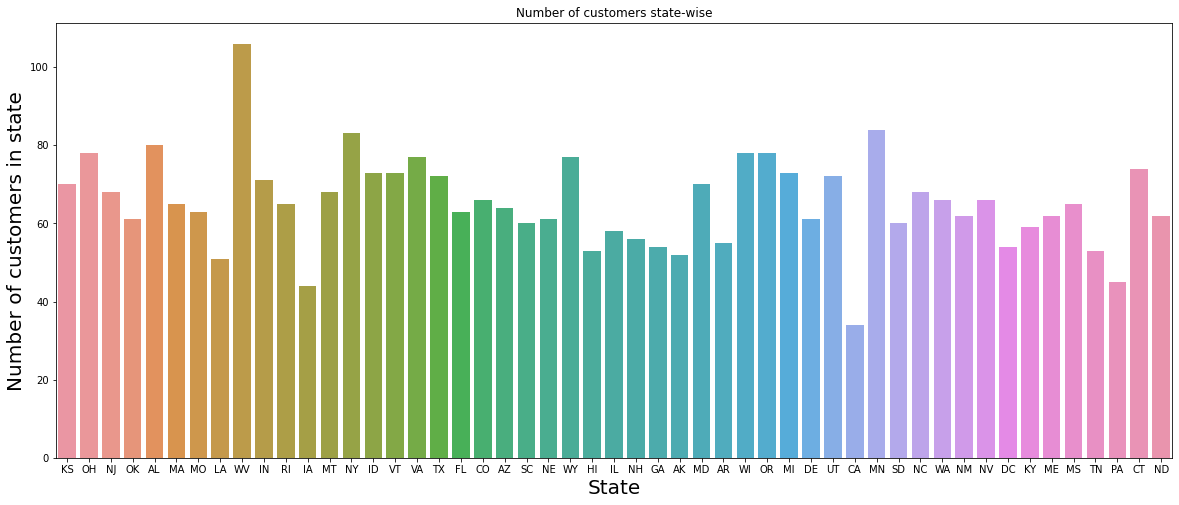

In [ ]:
# Total night minutes     3333 non-null   float64
#  13  Total night calls       3333 non-null   int64  
#  14  Total night charge      3333 non-null   float64
plt.rcParams['figure.figsize'] = (20, 8)
p = sns.countplot(x='State', data=telecom_df)
p.set_title("Number of customers state-wise")
p.set_xlabel("State", fontsize = 20)
p.set_ylabel("Number of customers in state", fontsize = 20)

Text(0.5, 0, 'Churn value ')

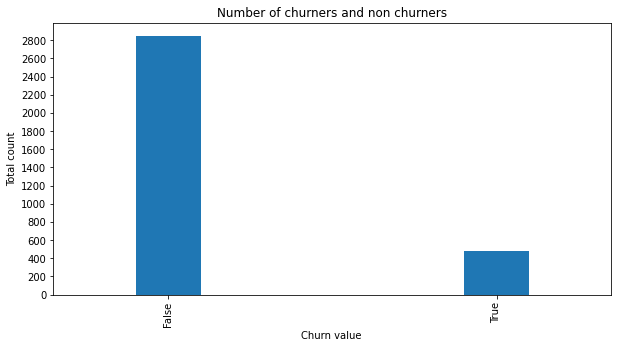

In [ ]:
# Number of churners and non churners
plt.rcParams['figure.figsize'] = (10, 5)
telecom_df.groupby('Churn')['Churn'].count().plot(kind= 'bar', width =0.2)
plt.locator_params('y',nbins = 25)
plt.title('Number of churners and non churners')
plt.ylabel('Total count')
plt.xlabel('Churn value ')

####State with highest number of subscriber

Text(0, 0.5, 'States')

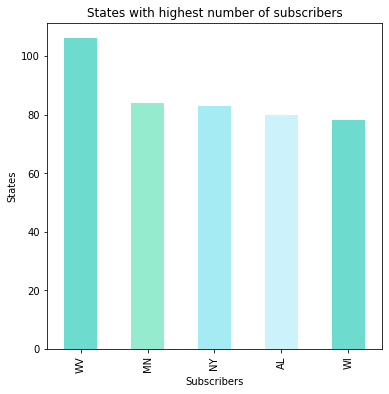

In [ ]:
states_with_most_subscribers=telecom_df['State'].value_counts().head(5)   #gives series of first 5 states with count

 #plotting bar graph
plot = states_with_most_subscribers.plot.bar(figsize=(6, 6),color=['#6DDCCF','#94EBCD','#A4EBF3','#CCF2FC'])     

plt.title('States with highest number of subscribers')   #setting title 
#setting x and y label
plt.xlabel('Subscribers')     
plt.ylabel('States')

##**State wise churners and non churners**

In [ ]:
def compare_bar(x,y):
  telecom_df.groupby([x, y])[y].count().unstack(level=-1).plot(kind= 'bar')
  plt.title(x +" vs " +y ) 
  plt.xlabel(x,fontsize= 25)
  plt.locator_params(y,nbins = 25)
  plt.ylabel('count',fontsize= 25)

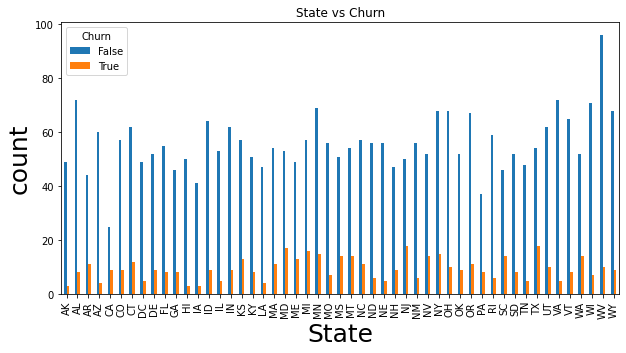

In [ ]:
compare_bar('State', 'Churn')

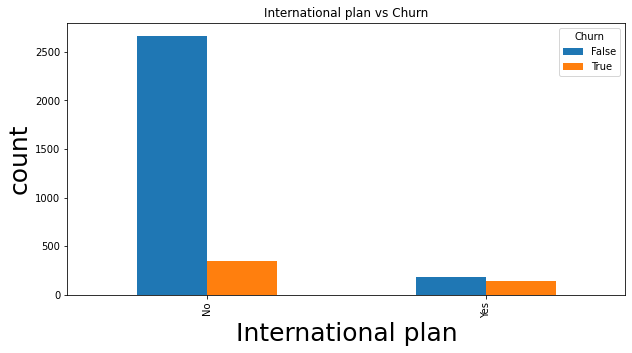

In [ ]:
compare_bar('International plan', 'Churn')

### **Visualizing customers who have opted for voice mail plan and churned**

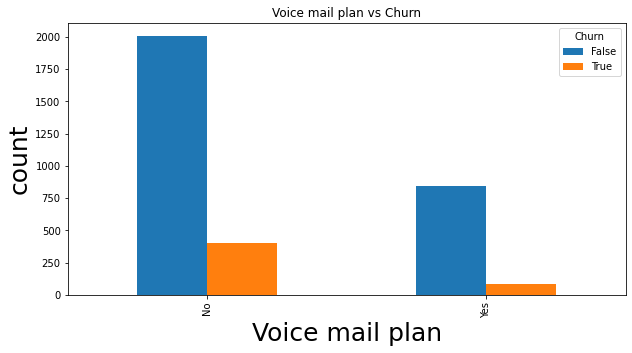

In [ ]:
compare_bar('Voice mail plan', 'Churn')

**Visualizing customer service calls vs churn**

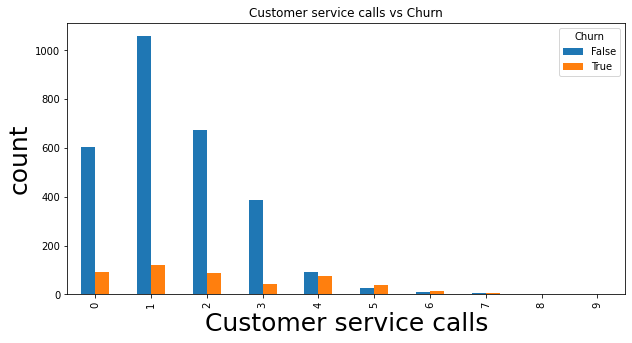

In [ ]:
compare_bar('Customer service calls', 'Churn')

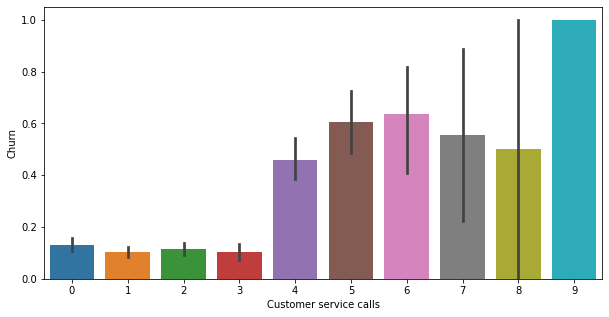

In [ ]:
sns.barplot(x="Customer service calls", y ="Churn" , data = telecom_df)

## **Plotting the top 5 states with high churning rate**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


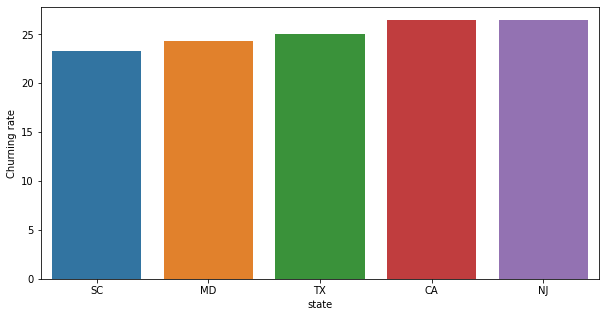

In [ ]:
b= a.sort_values(by = 'Churning rate').tail(5)
b
sns.barplot('state', 'Churning rate' , data = b)

## **Plotting the last 5 states with low churning rate**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 5 States Having Lowest Churning Rate')

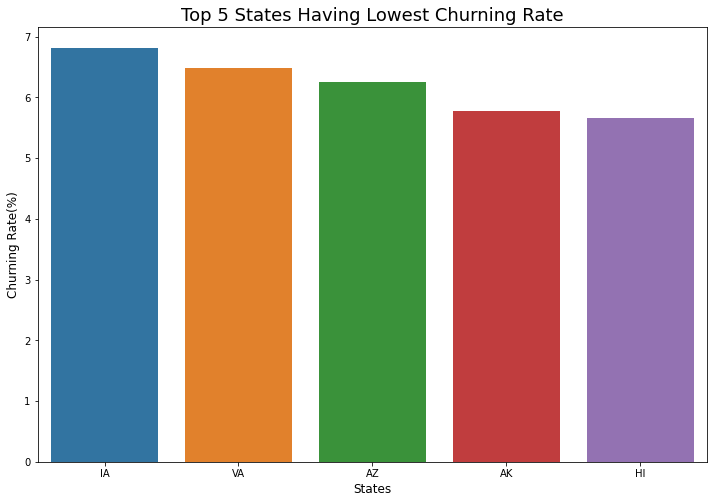

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot('state','Churning rate',data=a.iloc[-5:,:])
plt.xlabel('States',fontsize=12)
plt.ylabel('Churning Rate(%)',fontsize=12)
plt.title('Top 5 States Having Lowest Churning Rate',fontsize=18)

In [ ]:
telecom_df.Churn.head(50)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: Churn, dtype: bool

In [ ]:
df_10 = telecom_df.groupby(['State']).agg({'Total day minutes':'mean','Total eve minutes':'mean', 'Total night minutes':'mean'}).sort_values(by= ['Total day minutes','Total eve minutes','Total night minutes'])
df_10.rename(columns= {'Total day minutes':"total day minutes mean",'Total eve minutes':"total eve minutes mean" , 'Total night minutes':"total night minutes mean"})


,total day minutes mean,total eve minutes mean,total night minutes mean
State,,,
SC,166.441667,207.456667,195.136667
RI,167.478462,211.038462,204.052308
MO,170.506349,200.141270,209.146032
DC,171.379630,196.272222,206.348148
NM,171.429032,212.193548,200.193548
AZ,171.604688,187.748437,194.004687
IL,173.591379,196.798276,197.605172
KY,173.754237,196.244068,198.355932
WV,173.950943,188.413208,201.055660


In [ ]:
factor =pd.crosstab(telecom_df['Churn'], telecom_df["International plan"],margins=True)
factor

International plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


##**Plotting the heatmap to see the correlation between different continuous columns.**

In [ ]:
corr_df= telecom_df.corr()

plt.rcParams['figure.figsize'] = (20,11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


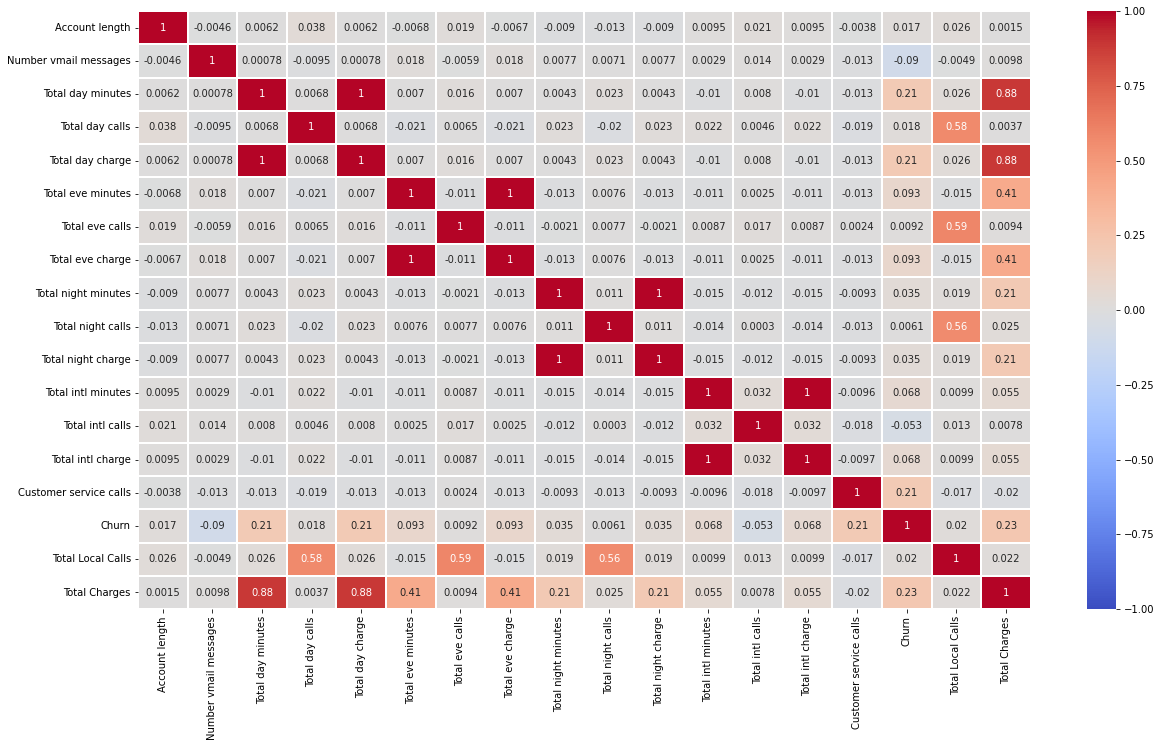

In [ ]:
sns.heatmap(corr_df, mask=np.zeros_like(corr_df, dtype=np.bool),vmin=-1, cmap='coolwarm', annot=True,linewidths=1)

####**Above plot shows that total charge is highly correlated with total day charge. Churn is correlated with total day call and customer service calls. Also total local calls is equal for day, evening and night that means equal call are being made.**

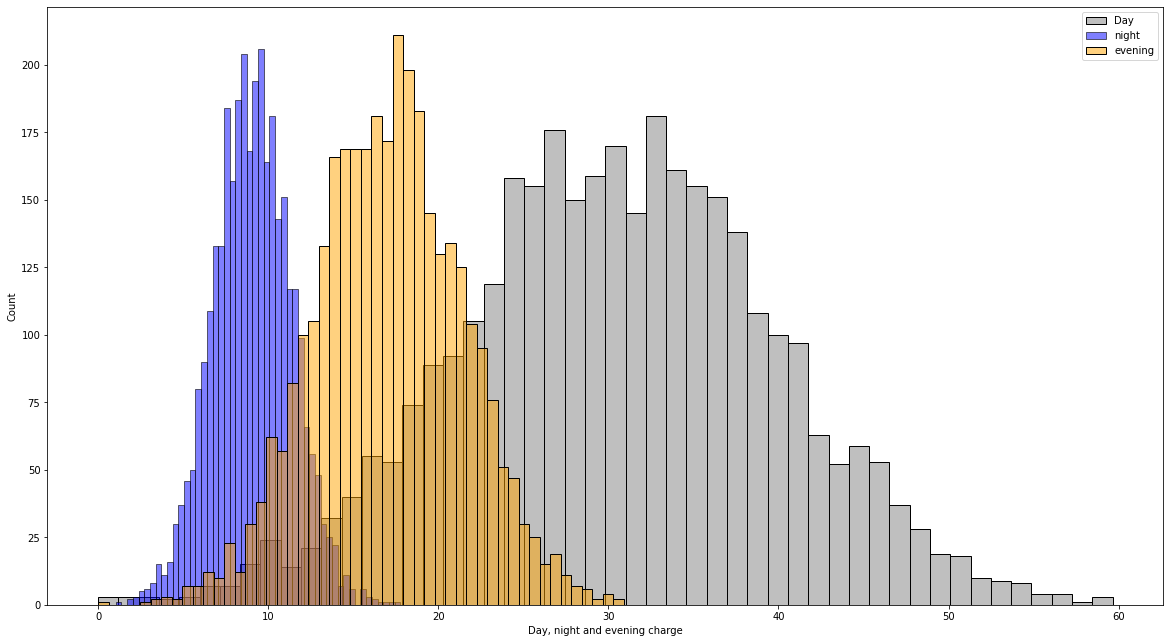

In [ ]:
#Histogram of Total day charge vs total night vs evening

sns.histplot(telecom_df, x="Total day charge",label = 'Day', bins=50, alpha= 0.5, color= 'grey')
sns.histplot(telecom_df, x="Total night charge", label = 'night', bins=50, alpha= 0.5, color= 'blue')
sns.histplot(telecom_df, x="Total eve charge", label = 'evening', bins=50, alpha= 0.5, color= 'orange')

plt.xlabel("Day, night and evening charge")
plt.legend()

#As we can see Day charge is very huge difference as compared to evening and night charges

Text(0.5, 1.0, 'Histogram Of Total Day Calls vs Total eve Calls and total eve calls')

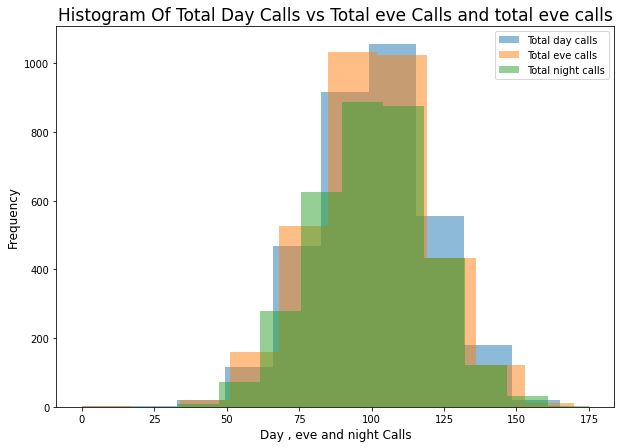

In [ ]:
#day and night calls
plt.rcParams["figure.figsize"] = (10,7)
plt.hist(telecom_df['Total day calls'], 
         label='Total day calls',
         alpha=0.5)
  
plt.hist(telecom_df['Total eve calls'], 
         label='Total eve calls',
         alpha=0.5)

  
plt.hist(telecom_df['Total night calls'], 
         label='Total night calls',
         alpha=0.5)


plt.legend()
plt.xlabel('Day , eve and night Calls',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram Of Total Day Calls vs Total eve Calls and total eve calls',fontsize=17)

***As we can see that in the above graph describing that number of calls in Day, night and evening are approximately same.***

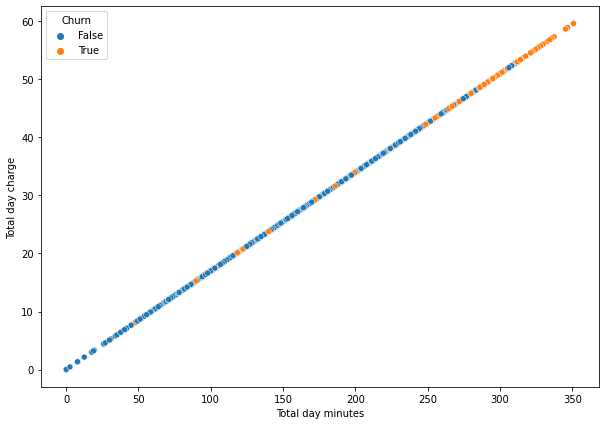

In [ ]:
sns.scatterplot(x='Total day minutes' , y = 'Total day charge', hue = 'Churn',data =telecom_df)


### **Above plot we can clearly say that subscriber having total day minutes greater than 275 minutes and total day charge greater than $45 are churned**

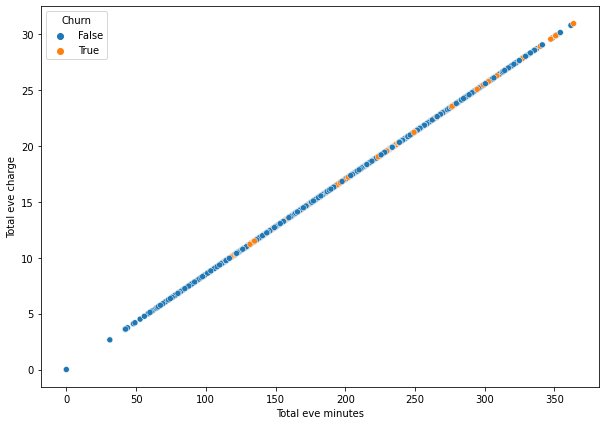

In [ ]:
sns.scatterplot(x='Total eve minutes' , y = 'Total eve charge', hue = 'Churn',data =telecom_df)

([<matplotlib.axis.XTick at 0x7fc185de1a50>,
 <a list of 19 Text major ticklabel objects>)

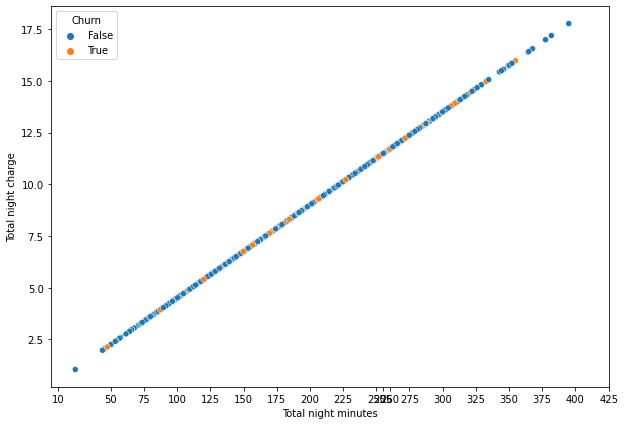

In [ ]:
value =[10,50,75,100,125,150,175,200,225,250,255,260,275,300,325,350,375,400,425]
sns.scatterplot(x='Total night minutes' , y = 'Total night charge', hue = 'Churn',data =telecom_df)
plt.xticks( value)


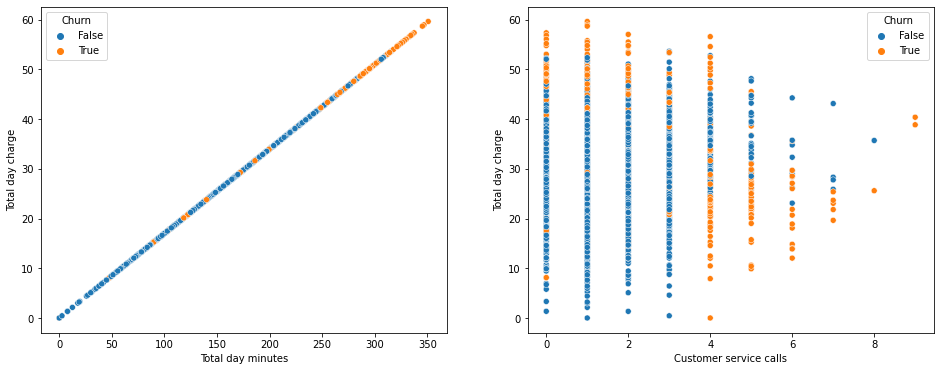

In [ ]:
_,ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x='Total day minutes' , y = 'Total day charge', hue = 'Churn',data =telecom_df, ax=ax[0])
sns.scatterplot(x='Customer service calls', y = 'Total day charge',hue = 'Churn',data =telecom_df, ax=ax[1])

##AS total day minutes and total day charge increase churning rate increase and aslo if customer service call increase churning rate increase.


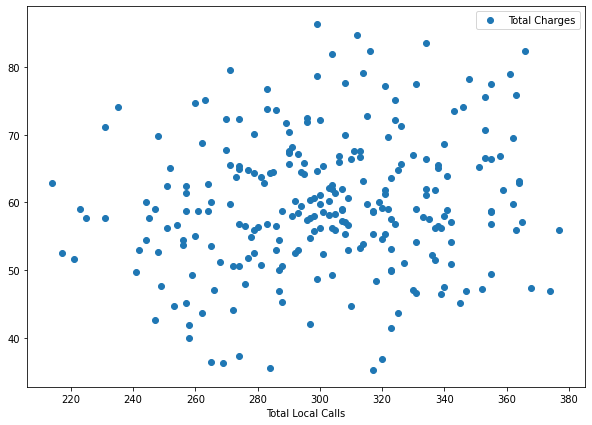

In [ ]:
df_rand=telecom_df.sample(n=250) # randomly selecting 250 entries from our dataset & storing in new dataframe
#showing relationships in total local calls & charges 
df_rand.plot(x='Total Local Calls', y='Total Charges', style='o');

***This shows that more number of subscribers makes 275-350 total local calls(day,eve,night) and are charged between $50-70. We can introduce offers like 'Those who have calling frequency of 300/month will be paying 10% lower charges than a regular subscriber'.***

**From above we can clearly observe that churn is dependent on the following factors:**
1. ***Churn rate mostly depends upon the 'Day charge' and 'Customer Service calls'.***


2. ***In 'eve charge' vs 'customer service calls' and 'night charge' vs 'customer service calls'. We can easily analyse that churn is independent of eve and night charge.***

#**Outlier analysis**

###We can draw the box plot for all the continuous columns to see the outlier in each column in our dataframe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


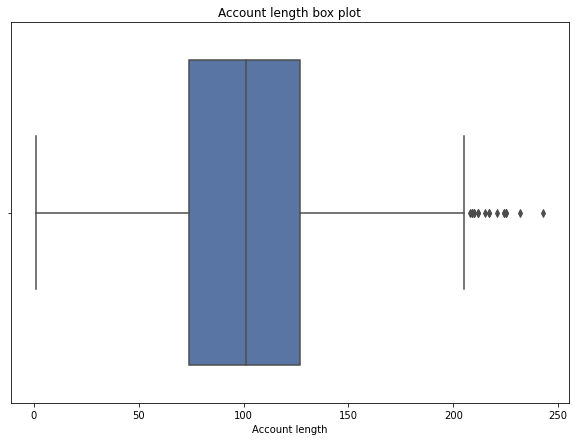

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


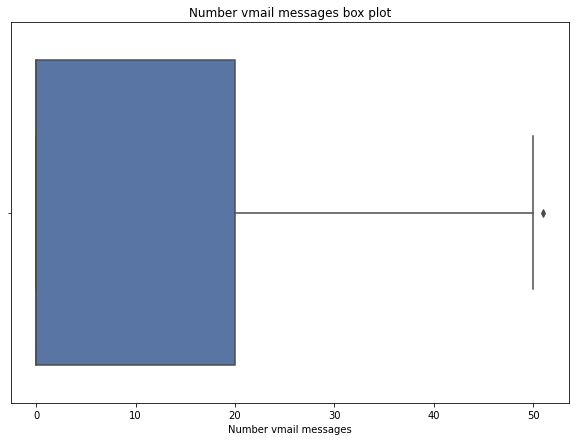

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


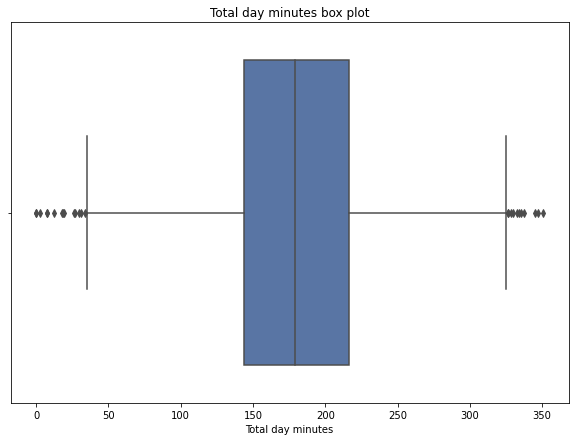

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


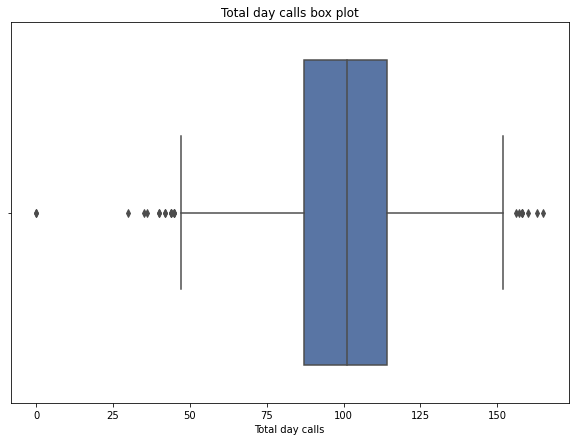

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


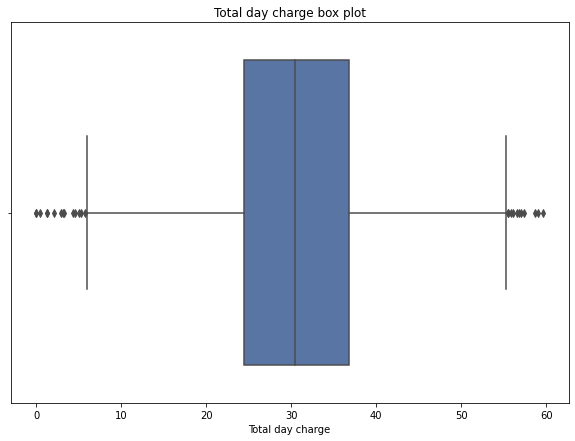

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


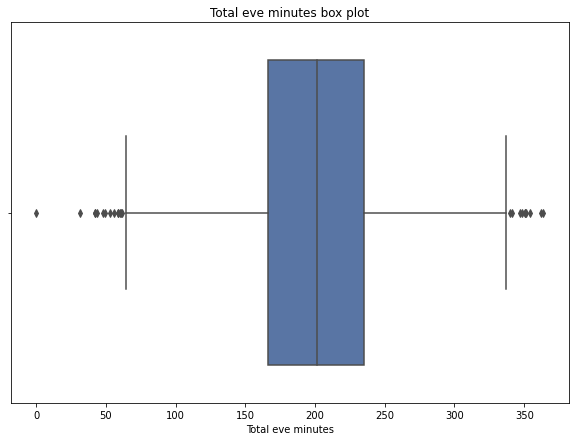

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


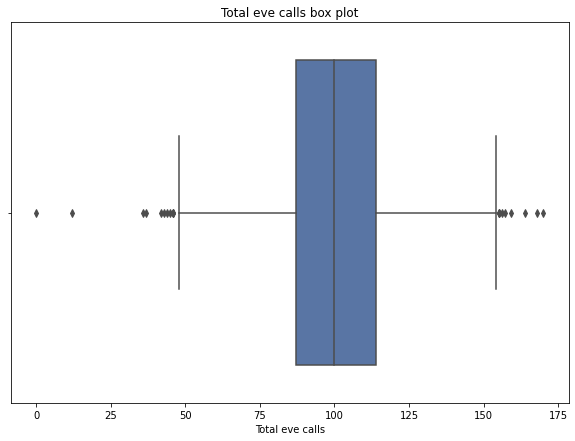

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


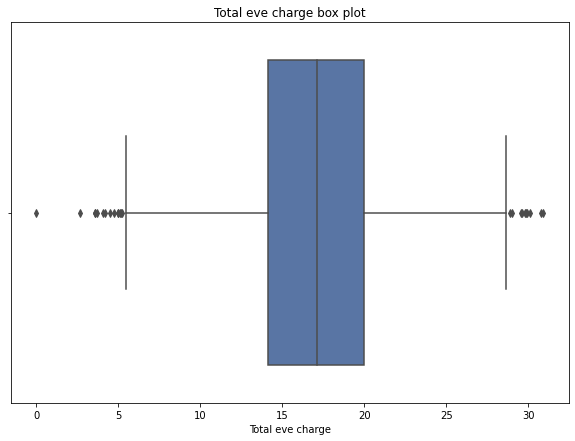

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


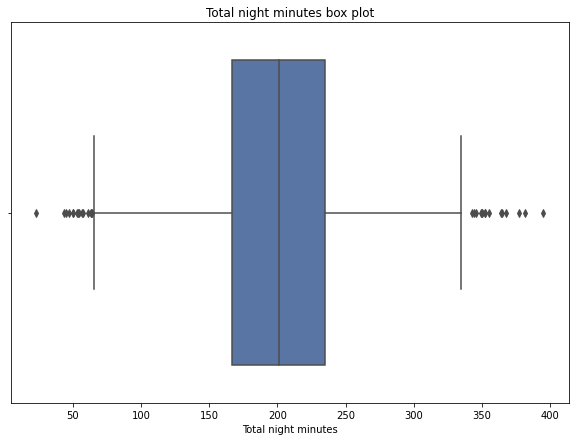

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


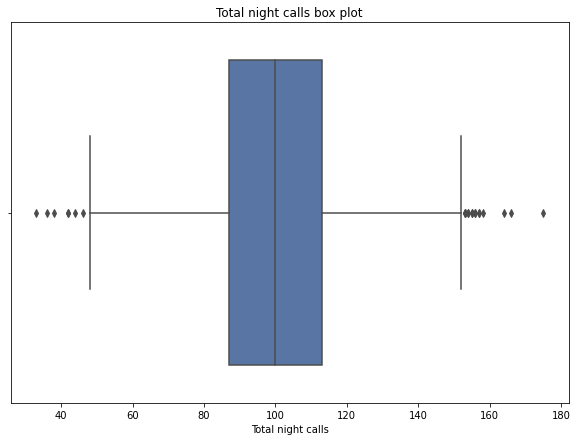

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


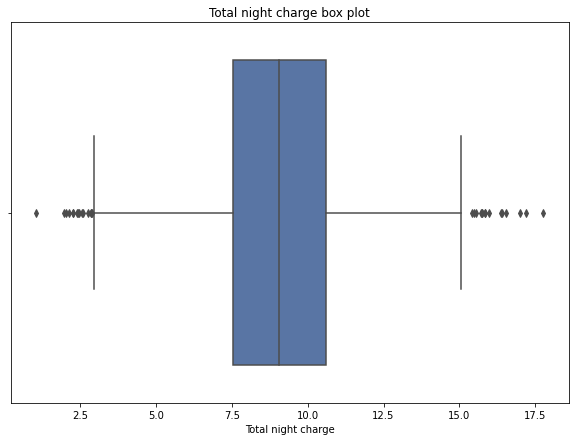

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


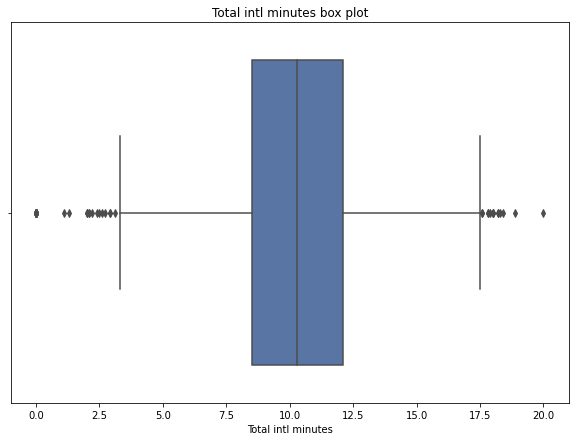

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


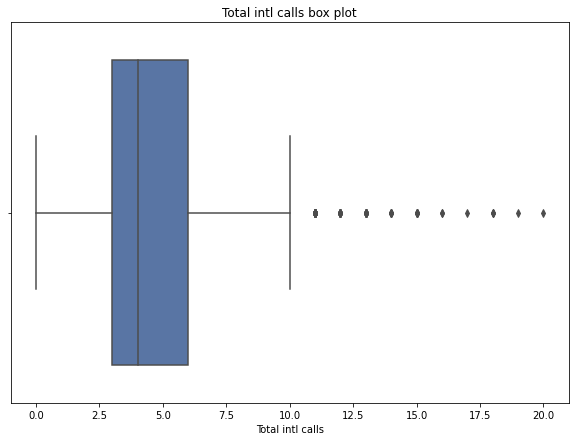

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


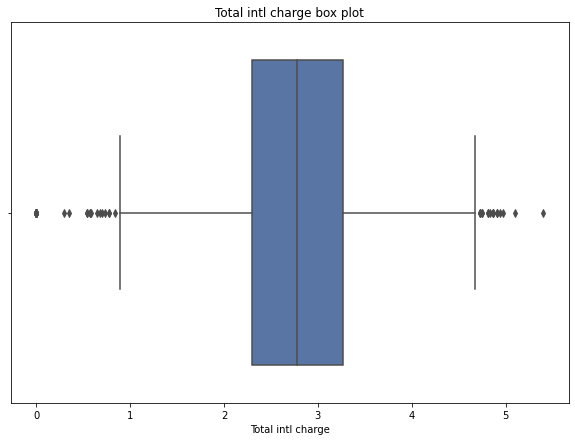

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


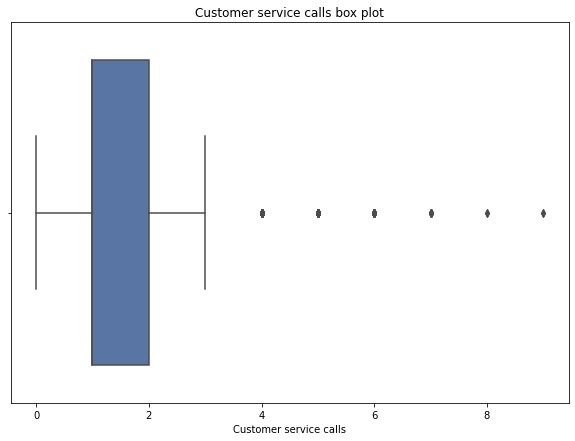

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


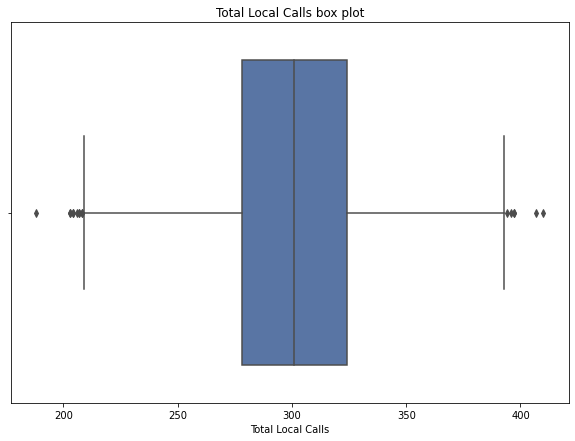

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


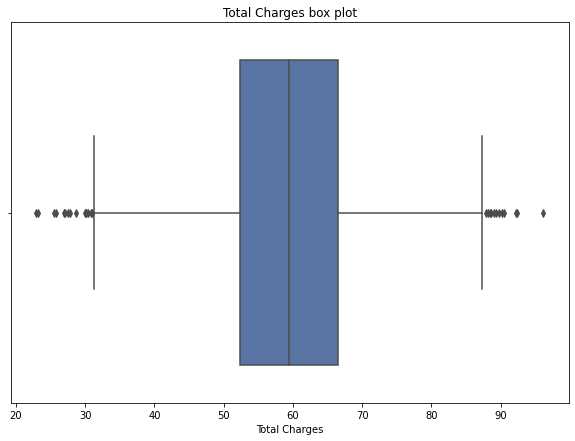

In [ ]:
#Plotting Box Plots
for i in cont_col:
    plt.figure()
    plt.clf()   #Clearing the figure
    sns.boxplot(telecom_df[i],palette="deep")
    plt.title(f"{i} box plot")
    plt.show()

From above box plots we can observe there are outliers in all columns so we have to start treating the outliers.

In [ ]:
#Treating Out Liers and Converting them to nan
for i in cont_col:
    q3, q1 = np.percentile(telecom_df.loc[:,i], [75 ,25])
    iqr = q3 - q1
    minn = q1 - (iqr*1.5)
    maxx = q3 + (iqr*1.5)
    #Converting to nan
    telecom_df.loc[telecom_df.loc[:,i] < minn,i] = np.nan
    telecom_df.loc[telecom_df.loc[:,i] > maxx,i] = np.nan
    print('{var} -- {X} Missing'.format(var = i, X = (telecom_df.loc[:,i].isnull().sum())))

Account length -- 18 Missing
Number vmail messages -- 1 Missing
Total day minutes -- 25 Missing
Total day calls -- 23 Missing
Total day charge -- 25 Missing
Total eve minutes -- 24 Missing
Total eve calls -- 20 Missing
Total eve charge -- 24 Missing
Total night minutes -- 30 Missing
Total night calls -- 22 Missing
Total night charge -- 30 Missing
Total intl minutes -- 46 Missing
Total intl calls -- 78 Missing
Total intl charge -- 49 Missing
Customer service calls -- 267 Missing
Total Local Calls -- 16 Missing
Total Charges -- 27 Missing


In [ ]:
telecom_df['Account length'].mean()

100.43046757164404

In [ ]:
telecom_df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Account length            100.430468
Number vmail messages       8.086134
Total day minutes         179.946252
Total day calls           100.587613
Total day charge           30.591403
Total eve minutes         201.176065
Total eve calls           100.164503
Total eve charge           17.100178
Total night minutes       200.825219
Total night calls          99.973422
Total night charge          9.037221
Total intl minutes         10.293368
Total intl calls            4.279263
Total intl charge           2.777948
Customer service calls      1.300065
Churn                       0.144914
Total Local Calls         300.769671
Total Charges              59.481307
dtype: float64

In [ ]:
#filling null values with mean
for i in cont_col:
  print(i)
  mean = telecom_df[i].mean()
  print(mean)
  telecom_df[i]=  telecom_df[i].fillna(mean)

Account length
100.43046757164404
Number vmail messages
8.086134453781513
Total day minutes
179.94625151148728
Total day calls
100.58761329305136
Total day charge
30.591402660217653
Total eve minutes
201.17606527651859
Total eve calls
100.16450347117416
Total eve charge
17.10017830160169
Total night minutes
200.82521949742656
Total night calls
99.9734219269103
Total night charge
9.037220708446867
Total intl minutes
10.293367812595072
Total intl calls
4.27926267281106
Total intl charge
2.777947624847747
Customer service calls
1.3000652315720809
Total Local Calls
300.76967138981007
Total Charges
59.481306715063525


In [ ]:
telecom_df.iloc[3320:,:]

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Local Calls,Total Charges
3320,GA,122.0,Yes,No,0.0,140.0,101.0,23.80,196.4,77.0,...,120.1,133.0,5.40,9.7,4.0,2.62,1.300065,True,311.0,48.510000
3321,VT,60.0,No,No,0.0,193.9,118.0,32.96,85.0,110.0,...,210.1,134.0,9.45,13.2,8.0,3.56,3.000000,False,362.0,53.200000
3322,MD,62.0,No,No,0.0,321.1,105.0,54.59,265.5,122.0,...,180.5,72.0,8.12,11.5,2.0,3.11,1.300065,True,299.0,59.481307
3323,IN,117.0,No,No,0.0,118.4,126.0,20.13,249.3,97.0,...,227.0,56.0,10.22,13.6,3.0,3.67,1.300065,True,279.0,55.210000
3324,WV,159.0,No,No,0.0,169.8,114.0,28.87,197.7,105.0,...,193.7,82.0,8.72,11.6,4.0,3.13,1.000000,False,301.0,57.520000
3325,OH,78.0,No,No,0.0,193.4,99.0,32.88,116.9,88.0,...,243.3,109.0,10.95,9.3,4.0,2.51,2.000000,False,296.0,56.280000
3326,OH,96.0,No,No,0.0,106.6,128.0,18.12,284.8,87.0,...,178.9,92.0,8.05,14.9,7.0,4.02,1.000000,False,307.0,54.400000
3327,SC,79.0,No,No,0.0,134.7,98.0,22.90,189.7,68.0,...,221.4,128.0,9.96,11.8,5.0,3.19,2.000000,False,294.0,52.170000
3328,AZ,192.0,No,Yes,36.0,156.2,77.0,26.55,215.5,126.0,...,279.1,83.0,12.56,9.9,6.0,2.67,2.000000,False,286.0,60.100000
3329,WV,68.0,No,No,0.0,231.1,57.0,39.29,153.4,55.0,...,191.3,123.0,8.61,9.6,4.0,2.59,3.000000,False,235.0,63.530000


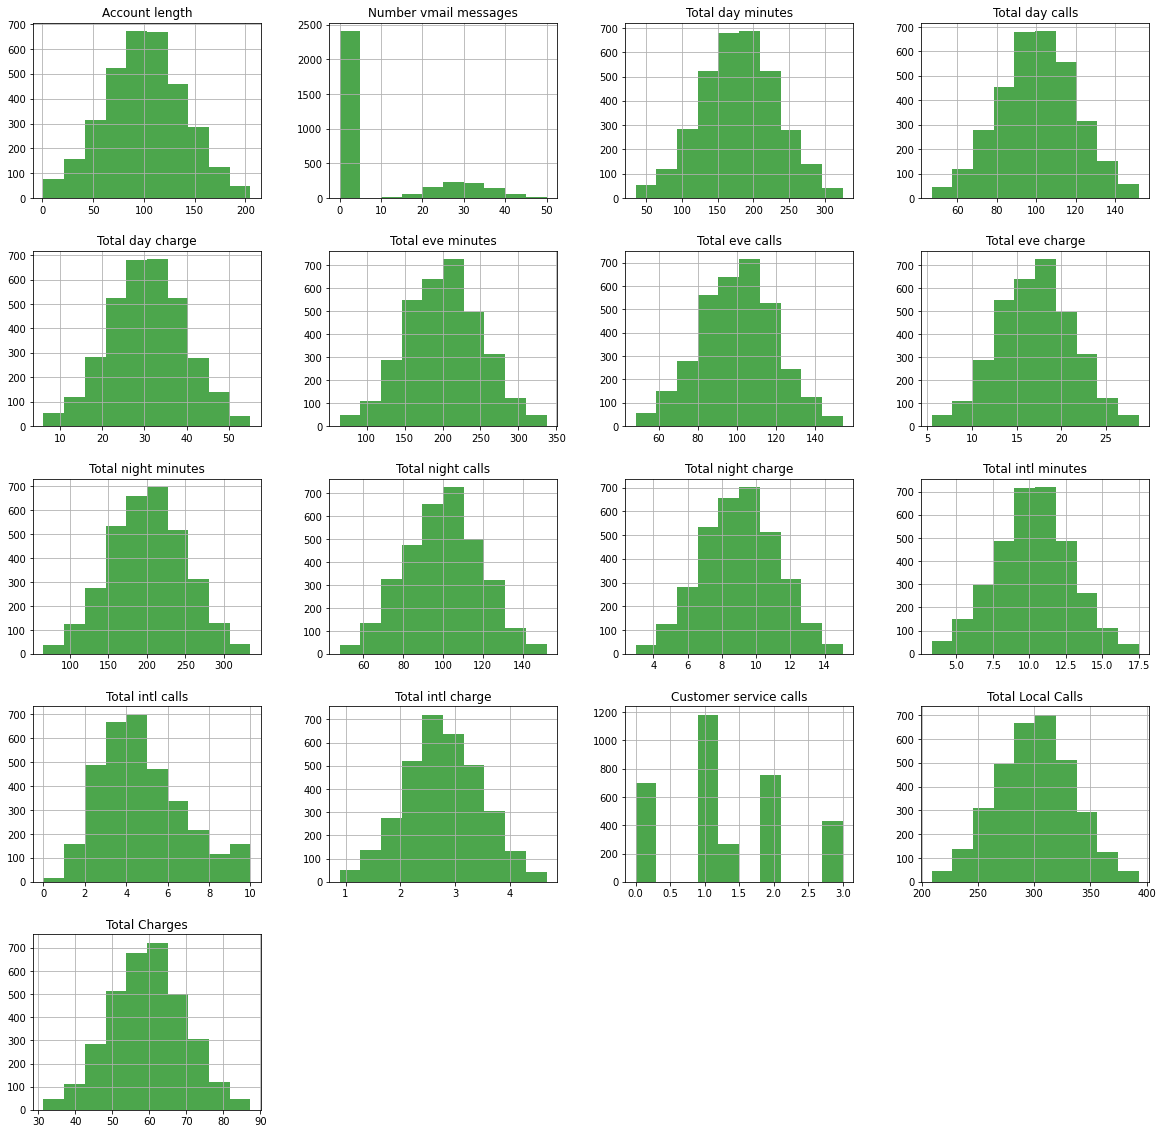

In [ ]:
#Checking distribution of data via pandas visualization

telecom_df[cont_col].hist(figsize=(20,20),color='g',alpha = 0.7)
plt.show()

##**As we can see from  above plot the distribution of all continuous column is normally distributed.**

In [ ]:
#Histogram breaks down by Churn Feature
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()

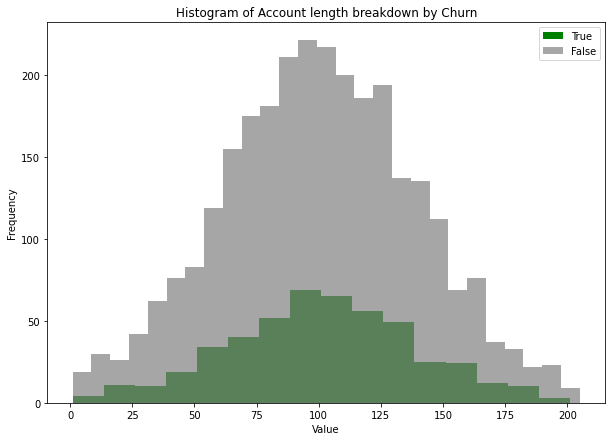

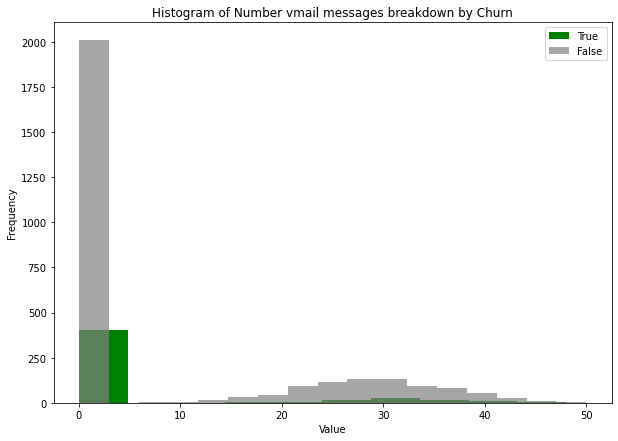

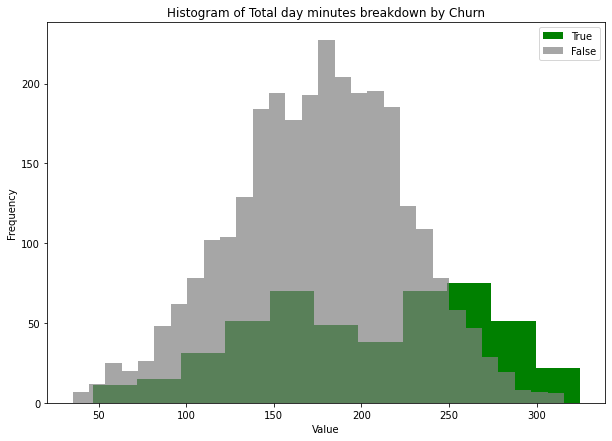

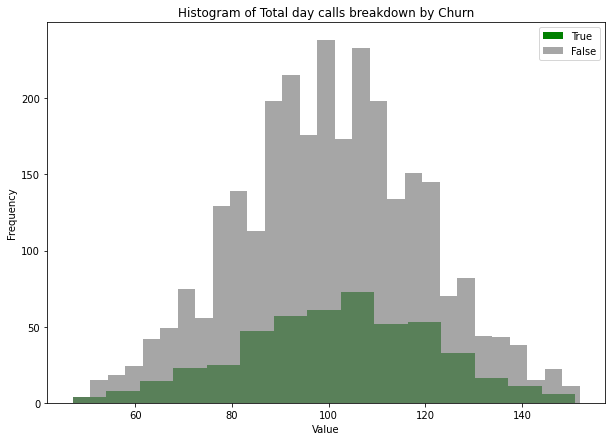

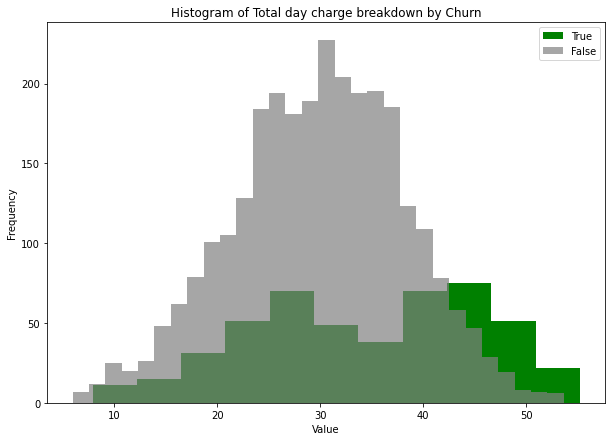

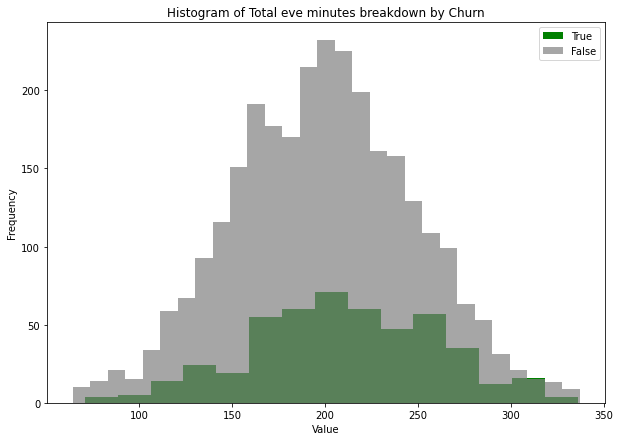

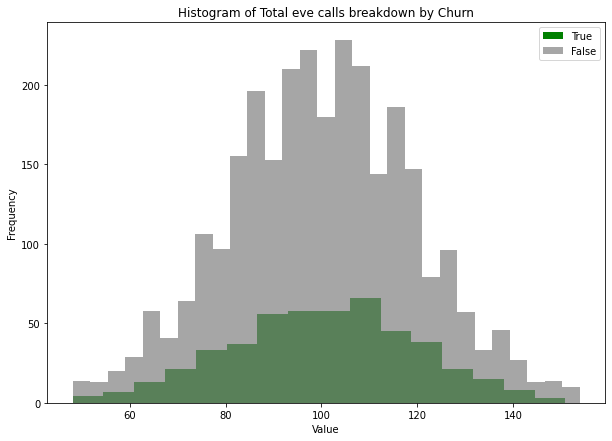

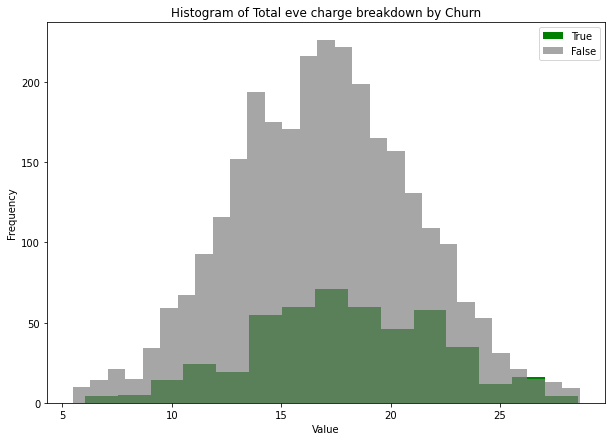

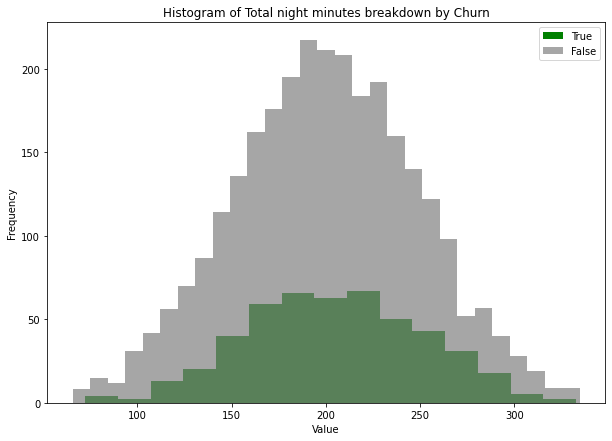

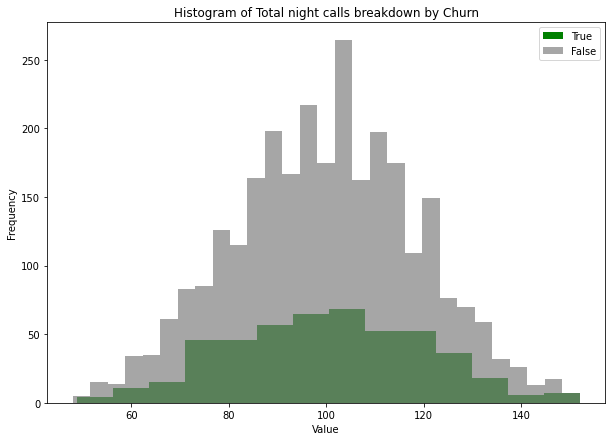

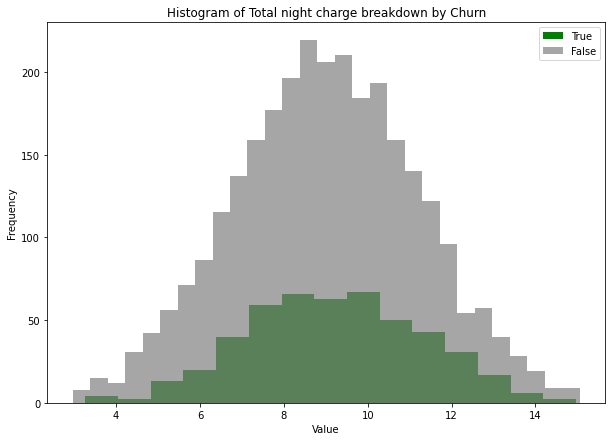

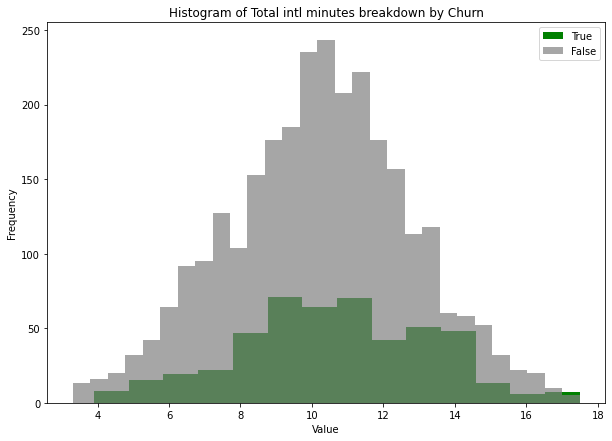

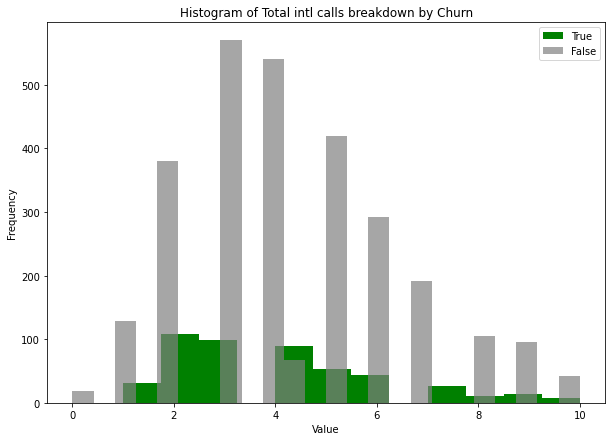

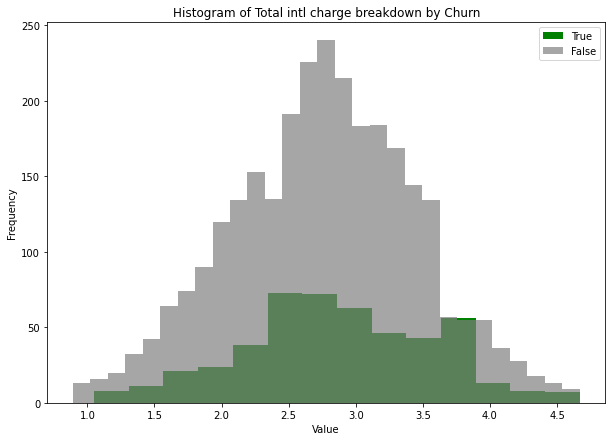

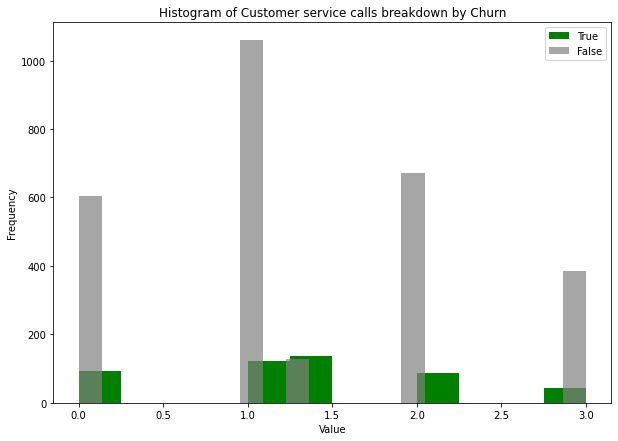

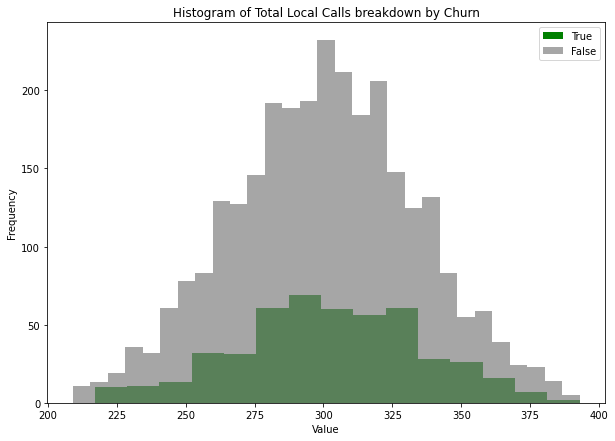

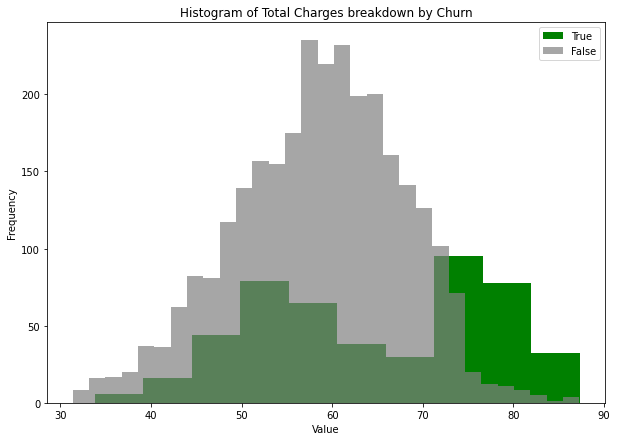

In [ ]:
for i in cont_col:
    plot_hist_y(telecom_df[i],telecom_df.Churn)

# **Insights:-**
1. The area code field is anomalous and can be omitted.
2. After analysing the dataset we can say that Customer those who are getting churned have:

  * High 'Total day minutes" with low customer service calls.
  * High "Total day charge" is the most prominent reason.
  * Low "Total charge" but they call the customer service more.
3.  Customers with Voicemail plans tend to churn less frequently.
4.  Customers with International plan tend to churn more frequently.

5.  More (>4) customer service calls clearly leads to more churning. 
6.  In CA Orange telecom have lowest number of subscribers but still have very high churning rate.


##**Recommendations:-**

#### 1) Most of the customers are getting churned due to high day charge. So, Orange Telecom should revise their plan to retain subscribers.

#### 2) If day charge is less still customers are churned because they are having issues with the customer services provided by Orange telecom. So, Orange telecom should improve their customer services.

####3) Customers with International plan tend to churn more frequently. Orange's International plan needs improvement in respective aspects associated to it.

####4) Orange telecom should give some offer such as 5%-10% discount in total bill to retain the customers who are having total charge greater than $70.

####5)Orange telecom should revise their marketing strategies to attract more customers for those states having less number of subscribers